# Modelling catalysis of izomerization in macro scale #
## Abstract ##
Catalysis is the increase in the rate of an otherwise slow chemical reaction, achieved by introducing an external substance (called catalyst).
Catalysis assumes that the catalyst will remain unmodified once the chemical reaction completes, but will allow the chemical transition to proceed at an increased rate.
It is commonly assumed that catalysis occures due to a decrease in the activation energy of a reaction, caused by the presence of the catalyst, facilitating its progress.

Here we present a simple model of a substrate with two stable conformations, a high energy conformation and a low energy conformation, seperated by an activation energy barrier.
We introduce a catalyst that is able to eliminate the activation energy barrier completely, facilitating the transition of the substrate from its high energy state to its low energy state.
Our model demonstrates that, in principle, a catalyst can not only reduce the activation energy of a reaction, but can eliminate it completely, causing the potential energy of the transition state to be lower than the high energy state, but higher than the low energy state.

## About this document ##
This document is written in the [Jupyter notebook](http://jupyter.org/) platform using the Python programming language.
It is therefore divided to blocks of text, like this one, and blocks of code written in the Python programming language.
The results of the execution of each block of code are displayed below it.
For first read, we recommend only reading the text and looking at the code output figures, ignoring the code itself.
Readers that would like to check the validity of the calculations or modify the code, tweaking parameters and seeing the effects on the output, should download the notebook and edit it.
The easiest way to install Jupyter notebook on a computer (Windows, OSX, or Linux) is through [Anaconda](https://docs.continuum.io/).

First some initialization code...

In [1]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

Populating the interactive namespace from numpy and matplotlib


## The model ##
Our model lies in the plane, so that both the substrate and the catalyst are two dimensional.
The substrate and the catalyst we consider are both rectangles, with point charges that are embedded in them.
The point charges are either fixed in their respective rectangle, or confined to move along lines in the rectangle, analogous to steric or other limitations in the molecular world.

### The substrate ###
Our substrate is depicted in the figure below.
Its rectangular body is marked in green.
It includes two, oppositely charged point charges (red and black dots in the figure).
The first charge is fixed at the bottom of the rectangle.
We refer to it as the 'reaction center' (red dot).
The second charge is confined to move on a two-segment line.
We refer to it as the 'state point' (black dot, confined to move on the blue line).
A conformation of the substrate can be uniquely defined by specifying the 'state angle' that is the angle between the horizontal axis and the line connecting the state point and the reaction center (magenta).
The energy of any conformation of the substrate is defined as the potential energy of the two charges with respect to each other:
$$E_p=\frac{q_1q_2}{r}$$

To accurately draw the substrate we first need to set some parameters that will be used in further calculations below.
These parameters are annotated in the figure below the code block.

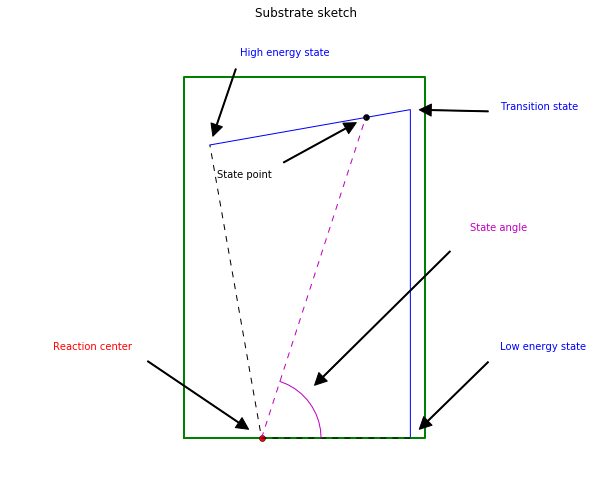

In [12]:
StaticAngle=80/360*2*pi # The angle at the top-right of the substrate is 80 degrees.
LowStateDist=0.5        # The distance of the 'reaction center' charge from the right segment,
                        # determining the energy of the low energy state.
HighStateDist=1         # The distance of the 'reaction center' charge from the top segment,
                        # determining the energy of the high energy state.

StaticAngComplement=pi-StaticAngle

# We use some trigonometry to calculate the angle of the transition state.
MaxAngle=arctan((HighStateDist/LowStateDist-cos(StaticAngComplement))/
                sin(StaticAngComplement))

def transitionCoords(angle):    # Given an angle relative to 3 O'clock
                                # from the reaction center, the function
                                # returns the xy position of the state point
    global MaxAngle, HighStateDist, LowStateDist, StaticAngComplement

    if angle > MaxAngle:
        dist=HighStateDist/cos(StaticAngComplement-angle)
    if angle <= MaxAngle:
        dist=LowStateDist/cos(angle)
    return dist*array([cos(angle),sin(angle)])

# Calculate the position of substrate elements with the reaction center at orig
# and the state charge at angle.
def calcSubstrateElements(orig,angle):       
    ReactionCenterLoc = [0,0]   # The locations of all points are relative 
                                # to the location of the reaction center.

# The points of the two-segment line to which the transition charge is confined:
    LowStateLoc  = [LowStateDist,ReactionCenterLoc[1]]
    HighStateLoc = [HighStateDist*cos(StaticAngComplement),
                    HighStateDist*sin(StaticAngComplement)]
    TransitionStateLoc = [LowStateLoc[0],tan(MaxAngle)*LowStateLoc[0]]

# The bounding rectangle
    LowerLeft = [1.5*HighStateLoc[0],ReactionCenterLoc[1]]
    UpperLeft= [1.5*HighStateLoc[0],1.1*TransitionStateLoc[1]]
    UpperRight= [1.1*LowStateLoc[0],1.1*TransitionStateLoc[1]]
    LowerRight= [1.1*LowStateLoc[0],ReactionCenterLoc[1]]

# The elements of the substrate
    StateLine = list(zip( * [LowStateLoc,TransitionStateLoc,HighStateLoc] ))
    SubstrateBound = list(zip( * [LowerLeft,UpperLeft,UpperRight,LowerRight,LowerLeft]))
    StateLoc = transitionCoords(angle)
    return {'ReactionCenterLoc':ReactionCenterLoc,
            'StateLoc':StateLoc,
            'LowStateLoc':LowStateLoc,
            'HighStateLoc':HighStateLoc,
            'TransitionStateLoc':TransitionStateLoc,
            'StateLine':StateLine,
            'SubstrateBound':SubstrateBound}

# Draw the substrate:
StateAngle=pi/2.5
SubstrateElements = calcSubstrateElements([0,0],StateAngle)

plot(SubstrateElements['StateLine'][0],SubstrateElements['StateLine'][1],'b')
plot(SubstrateElements['SubstrateBound'][0],
     SubstrateElements['SubstrateBound'][1],'g',linewidth=2)
plot(SubstrateElements['ReactionCenterLoc'][0],SubstrateElements['ReactionCenterLoc'][1],'ro')
plot(SubstrateElements['StateLoc'][0],SubstrateElements['StateLoc'][1],'ko')

# Draw assisting elements    
Distances = list(zip( * [SubstrateElements['LowStateLoc'],
                         SubstrateElements['ReactionCenterLoc'],
                         SubstrateElements['HighStateLoc']]))
plot(Distances[0],Distances[1],'k--')

annotate("Low energy state",color='b',
        xy=(SubstrateElements['LowStateLoc'][0],SubstrateElements['LowStateLoc'][1]),
        xytext=(SubstrateElements['LowStateLoc'][0]+0.3,SubstrateElements['LowStateLoc'][1]+0.3),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))
annotate("Transition state",color='b', 
        xy=(SubstrateElements['TransitionStateLoc'][0],SubstrateElements['TransitionStateLoc'][1]),
        xytext=(SubstrateElements['TransitionStateLoc'][0]+0.3,SubstrateElements['TransitionStateLoc'][1]),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))
annotate("High energy state",color='b',
        xy=(SubstrateElements['HighStateLoc'][0],SubstrateElements['HighStateLoc'][1]),
        xytext=(SubstrateElements['HighStateLoc'][0]+0.1,SubstrateElements['HighStateLoc'][1]+0.3),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

annotate("State point",
        xy=(SubstrateElements['StateLoc'][0],SubstrateElements['StateLoc'][1]),
        xytext=(SubstrateElements['StateLoc'][0]-0.5,SubstrateElements['StateLoc'][1]-0.2),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

annotate("Reaction center", xy=(0,0),
        xytext=(-0.7,0.3),color='red',
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

StateAngleLine=list(zip(*[SubstrateElements['ReactionCenterLoc'],
                          SubstrateElements['StateLoc']]))
plot(StateAngleLine[0],StateAngleLine[1],'m--')

## Draw the state angle
ax=[];ay=[];r=0.2
for a in linspace(0,StateAngle,10):
    ax.append(r*cos(a))
    ay.append(r*sin(a))
plot(ax,ay,'m')    

annotate("State angle",color='m',
        xy=(0.12,0.12), xytext=(0.7,0.7),
        arrowprops=dict(facecolor='black', shrink=0.1,width=1))

figsize(8,6)
plt.axes().set_aspect('equal', 'datalim')
ylim(-0.1,1.4)
axis('off')
title('Substrate sketch')

## Reaction energy landscape ##
In the absence of a catalyst, an energy barrier exists between the high energy state and the low energy state along the transition path, requireing an activation energy to be applied in order for the substrate to switch between the two conformations.

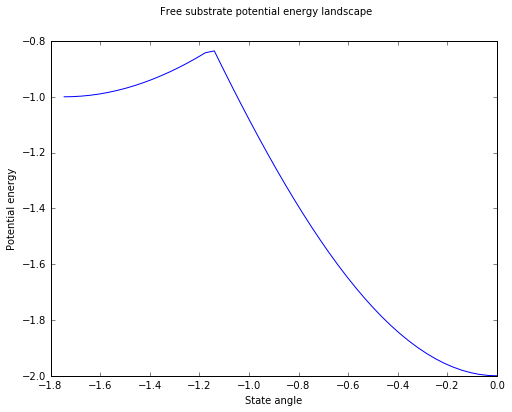

In [14]:
AngRange=linspace(StaticAngComplement,0)

def substrateEnergy(angle):
    coords = transitionCoords(angle)
    return -1/sqrt(sum(coords**2))

figsize(8,6)
plot(-AngRange,[substrateEnergy(x) for x in AngRange])
xlabel('State angle')
ylabel('Potential energy')
suptitle('Free substrate potential energy landscape')

### The catalyst ###
Our catalyst consists of two opposing charges fixed in a rectangle (see figure below).
The upper charge has the same sign as the reaction center and the bottom charge has the same sign as the state point.


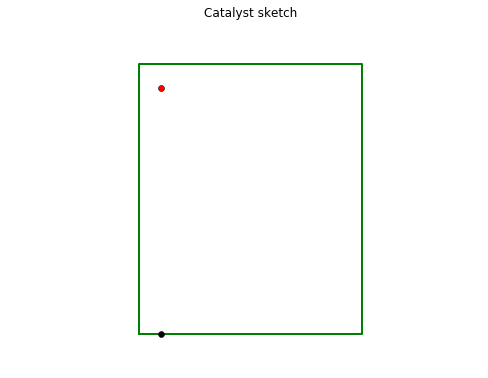

In [15]:
EnzymeHeight=TransitionStateLoc[1]
CatLowerLeft = [0,0]
CatLowerRight = [1,0]
CatUpperLeft = [0,EnzymeHeight*1.1]
CatUpperRight = [1,EnzymeHeight*1.1]
enzymeLine=list(zip(*[CatLowerLeft,CatLowerRight,
                      CatUpperRight,CatUpperLeft,CatLowerLeft]))
figsize(8,6)
plot(enzymeLine[0],enzymeLine[1],'g',linewidth=2)
plot(0.1,EnzymeHeight,'ro')
plot(0.1,0,'ko')
plt.axes().set_aspect('equal', 'datalim')
ylim(-0.1,1.4)
axis('off')
title('Catalyst sketch')

## Catalyst effect on the potential energy landscape ##
In our model, the catalyst location with respect to the substrate is confined to a horizontal line , such that a single number represents the distance between the reaction center and the lower charge of the catalyst.
We can therefore describe the state of the system (substrate and catalyst) by two parameters; The state angle and the distance between the substrate and the catalyst.

The following observations apply to the substrate-catalyst system:
1. Because the upper charge of the catalyst attracts the state point charge and the lower charge of the catalyst attracts the reaction center, when the substrate is far from the catalyst and the state point charge is in the high energy state, the substrate will be attracted to the catalyst.
This can be seen in the figure below as the potential energy of the free substrate (blue) at its high energy state (angle=-1.8) is higher than the potential energy of the substrate at its high energy state but in proximity to the catalyst (green).
2. As the figure below shows, there is a distance (1.45, arbitrary units), at which the catalyst charges interact with the substrate charges to produce a modified energy landscape that eliminates the activation energy barrier (green line vs. blue line).
3. When the substrate is in the low energy state, because the state point charge is closer to the lower catalyst charge than the reaction center charge, the substrate is repelled from the catalyst.
This is reflected in the figure as at angle=0 the potential energy of the substrate in proximity to the catalyst (green) is higher than the potential energy of the free substrate (blue).


In [16]:
def absElectricPotential(loc1,loc2):    # Returns the absolute value of the electric potential energy of two charges
    return 1/sqrt(sum((loc1-loc2)**2))

def enzymeSubstrateEnergy(angle,dist):  # Calulates, given the state angle of the substrate and the distance between
                                        # the substrate and the catalyst the potential energy of the entire system
    coords = transitionCoords(angle)
    Center = array([0,0])
    EnzymeUpper = array([dist,EnzymeHeight])
    EnzymeLower = array([dist,0])
    EnzymeUpperTransition = -1*absElectricPotential(coords,EnzymeUpper)
    EnzymeLowerTransition = absElectricPotential(coords,EnzymeLower)
    EnzymeUpperCenter = absElectricPotential(Center,EnzymeUpper)
    EnzymeLowerCenter = -1 * absElectricPotential(Center,EnzymeLower)
    
    return  substrateEnergy(angle)+EnzymeUpperTransition+EnzymeUpperCenter+EnzymeLowerTransition+EnzymeLowerCenter


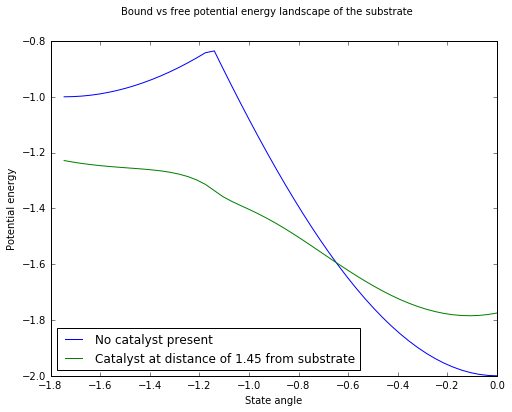

In [28]:
figsize(8,6)
minDist = 1.45
plot(-AngRange,[substrateEnergy(x) for x in AngRange],label='No catalyst present')
plot(-AngRange,[enzymeSubstrateEnergy(x,minDist) for x in AngRange],
     label=('Catalyst at distance of %.2f from substrate' % minDist))
legend(loc=3)
xlabel('State angle');ylabel('Potential energy')
suptitle('Bound vs free potential energy landscape of the substrate')

## The complete energy landscape and expected dynamics ##
The complete energy landscape of the interaction between the substrate and the catalyst is shown below.
It depicts the potential energy of the system as a function of both the state angle and the distance between the catalyst and the substrate.
When starting at a state of high energy, unbound substrate, the system is expected to proceed down the energy landscape to minimize its potential energy.
While not necessarily exact, the yellow line represents the expected trace of gradient decsent down the energy landscape following the transition of the system until it reaches a minimal potential energy point which is the unbound, low energy state, substrate.
The two energy landscapes depicted above (free substrate and bound substrate) are plotted in their respective colors in this 3D plot and represent the bounds of the energy landscape (theoretically the free enzyme is at an infinite distance from the substrate but the figure only shows the energy landscape when the distance between the two is 2.5, which is large enough to make the interaction negligible).

In [18]:
EnzymeXs=linspace(5*LowStateDist,minDist)  # The bounds of the distance between the
                                           # substrate and the catalyst

X,Y = meshgrid(AngRange,EnzymeXs)
Z=X.copy()
for x in range(X.shape[0]): # Calculate the energy of the system at each position
    for y in range(X.shape[1]):
        Z[x,y]=enzymeSubstrateEnergy(X[x,y],Y[x,y])
X=-X

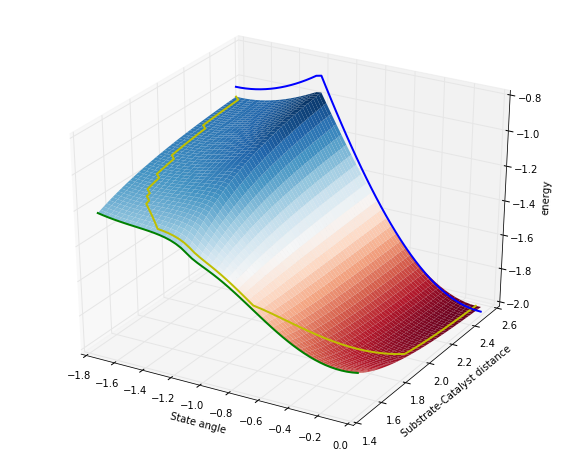

In [34]:
fig = plt.figure()
figsize(10,8)
ax = fig.gca(projection='3d')

# Plot the energy landscape
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                     cmap=cm.RdBu,linewidth=0)
ax.set_xlabel('State angle');ax.set_ylabel('');ax.set_zlabel('energy')

# Calculate the gradient descent path
x=0;y=0
gradx = [X[x,y]];grady = [Y[x,y]];gradz = [Z[x,y]]

def nextIndex(x,y): # Given a position in the phase space find the next position.
    global X;global Y;global Z
    current = Z[x,y]
    for i in range(max(x-1,0),min(x+2,X.shape[0]-1)):
        for j in range(max(y-1,0),min(y+2,X.shape[1]-1)):
            if Z[i,j]<=current:
                current = Z[i,j]
                retx = i;rety = j
    return (retx,rety)

while nextIndex(x,y) != (x,y): # Trace the path until reaching a local minimum.
    (x,y) = nextIndex(x,y)
    gradx.append(X[x,y])
    grady.append(Y[x,y])
    gradz.append(Z[x,y])
    
ax.plot(gradx,grady,gradz,'y',linewidth=2)

# Plot the unbound and bound energy landscape lines from the previous figure.
ax.plot(-AngRange,[EnzymeXs[0]] * len(AngRange),
        [substrateEnergy(x) for x in AngRange],'b',linewidth=2)
ax.plot(-AngRange,[EnzymeXs[-1]] * len(AngRange),
        [enzymeSubstrateEnergy(x,1.45) for x in AngRange],'g',linewidth=2)